# Setup 

In [1]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
# from local_functions import *
import local_functions as lf

# make sure the figures plot inline rather than at the end
%matplotlib inline


Default libraries loaded.


# Paths and Parameters

# Read Data

In [2]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_to_woa.nc')

# WOA
ds_WOA = xr.open_dataset('../data/woa_processed.nc')

# Correlation Maps

In [3]:
slope_temp_doxy, intercept_temp_doxy, r_value_temp_doxy, p_value_temp_doxy, std_err_temp_doxy = lf.seasonal_space_correlate(ds_WOA.temp_50_200,
                                                                                                     ds_WOA.doxy_50_200)
            
slope_temp_sla, intercept_temp_sla, r_value_temp_sla, p_value_temp_sla, std_err_temp_sla= lf.seasonal_space_correlate(ds_WOA.temp_50_200,
                                                                                                     ds_SLA.mon_sla_mon_clim )

slope_doxy_sla, intercept_doxy_sla, r_value_doxy_sla, p_value_doxy_sla, std_err_doxy_sla = lf.seasonal_space_correlate(ds_WOA.doxy_50_200,
                                                                                                     ds_SLA.mon_sla_mon_clim )

slope_nitrate_sla, intercept_nitrate_sla, r_value_nitrate_sla, p_value_nitrate_sla, std_err_nitrate_sla = lf.seasonal_space_correlate(ds_WOA.nitrate_50_200,
                                                                                                     ds_SLA.mon_sla_mon_clim )
  

 79%|███████▉  | 1518/1925 [00:06<00:01, 277.18it/s]/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
 82%|████████▏ | 1577/1925 [00:06<00:01, 282.43it/s]/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in

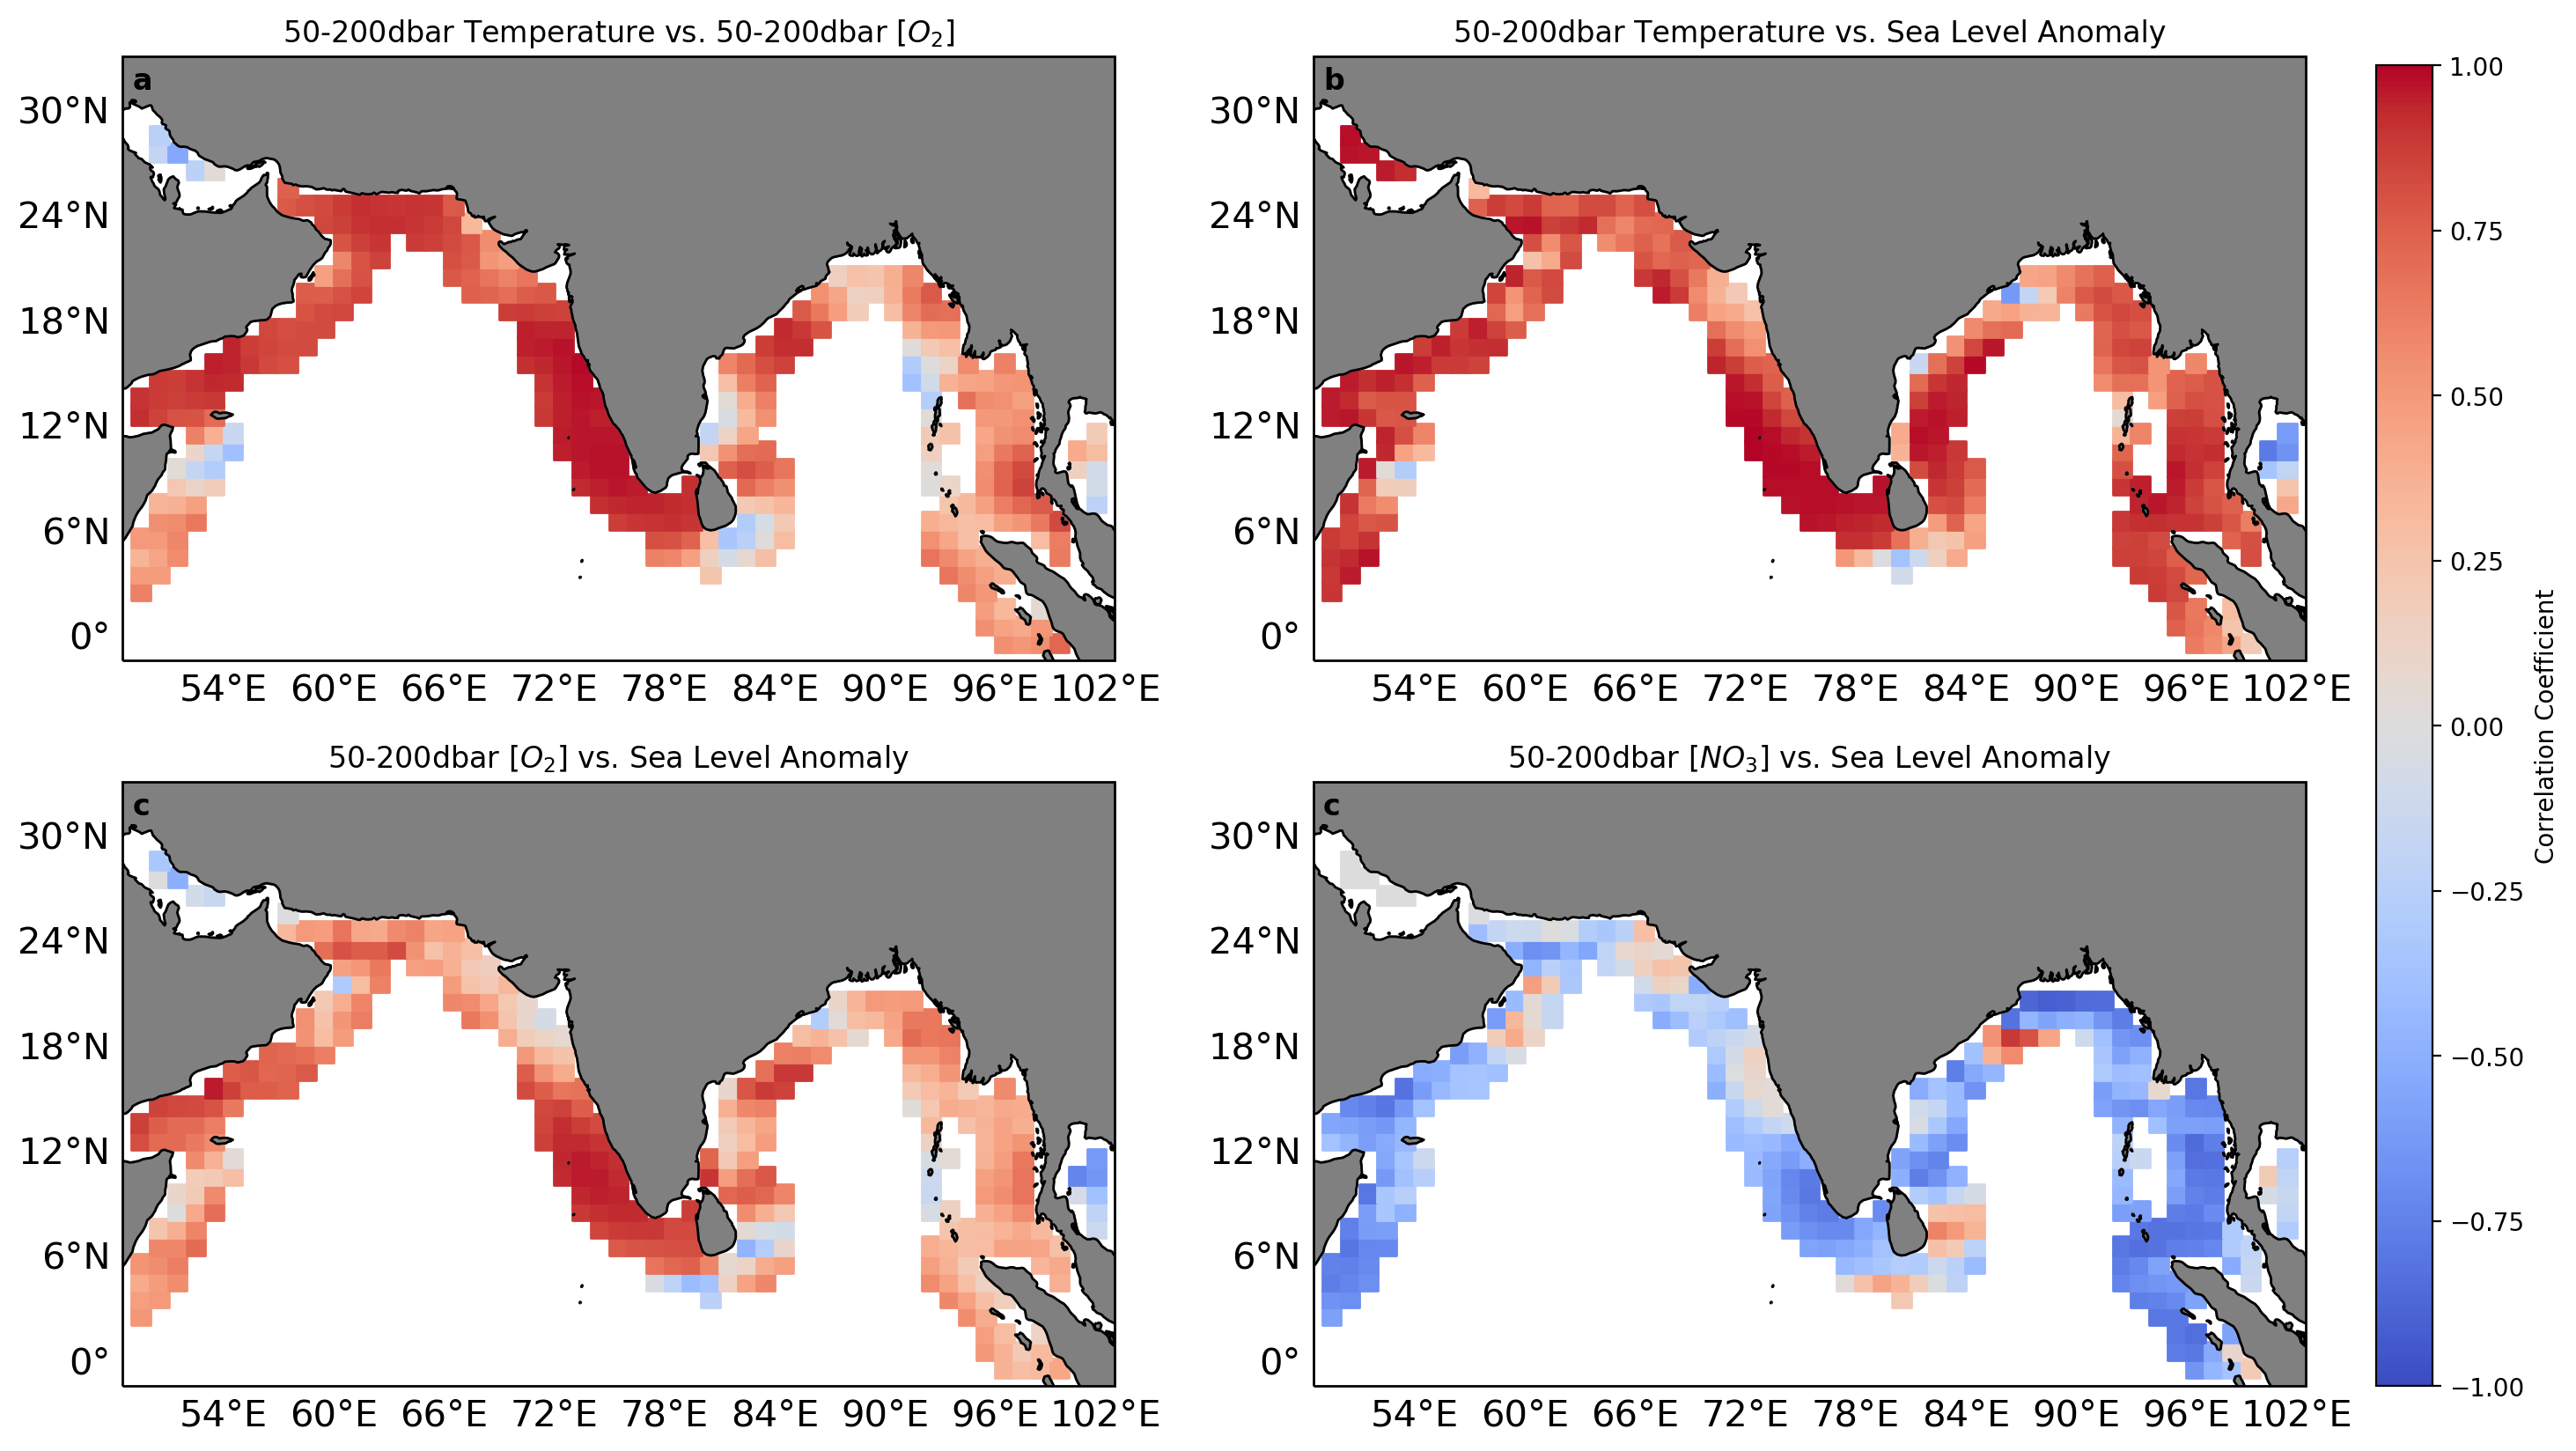

In [9]:
fig = plt.figure(figsize=(16,10),dpi=200)

xx,yy = np.meshgrid(ds_WOA.lon,ds_WOA.lat)

sz = 60

##############################################################

ax = fig.add_subplot(221,projection= ccrs.PlateCarree())
var = r_value_temp_doxy.flatten()
ax.scatter(ds_WOA.coastal_mask_xx,ds_WOA.coastal_mask_yy,c = var[ds_WOA.coastal_mask],
               cmap = plt.cm.coolwarm,s = sz,marker = 's',vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree())
lf.add_land(ax)
lf.add_letter(ax, 'a')
ax.set_title('50-200dbar Temperature vs. 50-200dbar [$O_2$]')

ax = fig.add_subplot(222,projection= ccrs.PlateCarree())
var = r_value_temp_sla.flatten()
ax.scatter(ds_WOA.coastal_mask_xx,ds_WOA.coastal_mask_yy,c = var[ds_WOA.coastal_mask],
               cmap = plt.cm.coolwarm,s = sz,marker = 's',vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree())
lf.add_land(ax)
lf.add_letter(ax, 'b')
ax.set_title('50-200dbar Temperature vs. Sea Level Anomaly')

ax = fig.add_subplot(223,projection= ccrs.PlateCarree())
var = r_value_doxy_sla.flatten()
ax.scatter(ds_WOA.coastal_mask_xx,ds_WOA.coastal_mask_yy,c = var[ds_WOA.coastal_mask],
               cmap = plt.cm.coolwarm,s = sz,marker = 's',vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree())
lf.add_land(ax)
lf.add_letter(ax, 'c')
ax.set_title('50-200dbar [$O_2$] vs. Sea Level Anomaly')

ax = fig.add_subplot(224,projection= ccrs.PlateCarree())
var = r_value_nitrate_sla.flatten()
p = ax.scatter(ds_WOA.coastal_mask_xx,ds_WOA.coastal_mask_yy,c = var[ds_WOA.coastal_mask],
               cmap = plt.cm.coolwarm,s = sz,marker = 's',vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree())
lf.add_land(ax)
lf.add_letter(ax, 'c')
ax.set_title('50-200dbar [$NO_3$] vs. Sea Level Anomaly')

lf.add_single_vert_cbar(fig,p,'Correlation Coefficient')

# <font color='darkblue'>Save</font> 